Networkx basics, some code and materials adapted from Hiroki Sayama's awesome textbook. http://textbooks.opensuny.org/introduction-to-the-modeling-and-analysis-of-complex-systems/

In [1]:
from __future__ import division
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.rcParams['figure.figsize'] = (20.0, 16.0)

Lots of stuff imported there, let's review: networkx is the tool we are going to use to analyze networks, matplolib.pyplot is for graphing stuff and graphical handling. numpy is math, matplotlib inline lets data show up in the notebook, and the next command makes our figures bigger so we can see them more easily.

First we need to talk about what a 'network' is. A network is any list of relationships between objects. It could be synaptic connections, friendships, facebook likes, interactions, roads, casual public intereactions. It can be directed (ie we know which object acts on the other), undirected (ie objects interact mutually), quantitative (we know how strongly objects interact in a quantitative sense), or binary (we jsut know that objects interact).

Lets start by making a hypothetical network g, and adding some nodes to it. A node is any object that interacts (or doesn't interact) in the network.

In [2]:
g=nx.Graph() #graph object
g.add_nodes_from (['hippocampus','piriform','entorhinal','perirhinal','frontal cortex'])

Now that we made some nodes, let's add some connections between those nodes, these will be called 'edges'

In [3]:
g.add_edges_from([('hippocampus','entorhinal'),('frontal cortex','hippocampus'),('piriform','entorhinal')])

Now that we've added some objects to our network let's print those details. Networkx gives us a few ways to do that.

In [4]:
print(g.nodes())
print(g.edges())

['piriform', 'entorhinal', 'perirhinal', 'hippocampus', 'frontal cortex']
[('piriform', 'entorhinal'), ('entorhinal', 'hippocampus'), ('hippocampus', 'frontal cortex')]


Today we won't be working with it, but in theory nodes and edges can have any number of traits. This is useful if you want to store lots of inforaation about the interaction, this comes in handy for filtering for analysis or visualization. Below I print all traits associated with each node, you'll notice it's empty.

In [5]:
g.node

{'entorhinal': {},
 'frontal cortex': {},
 'hippocampus': {},
 'perirhinal': {},
 'piriform': {}}

Now we'll draw the network I made, don't worry about the syntax quite yet, but you'll notice it's pretty uninteresting

//anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


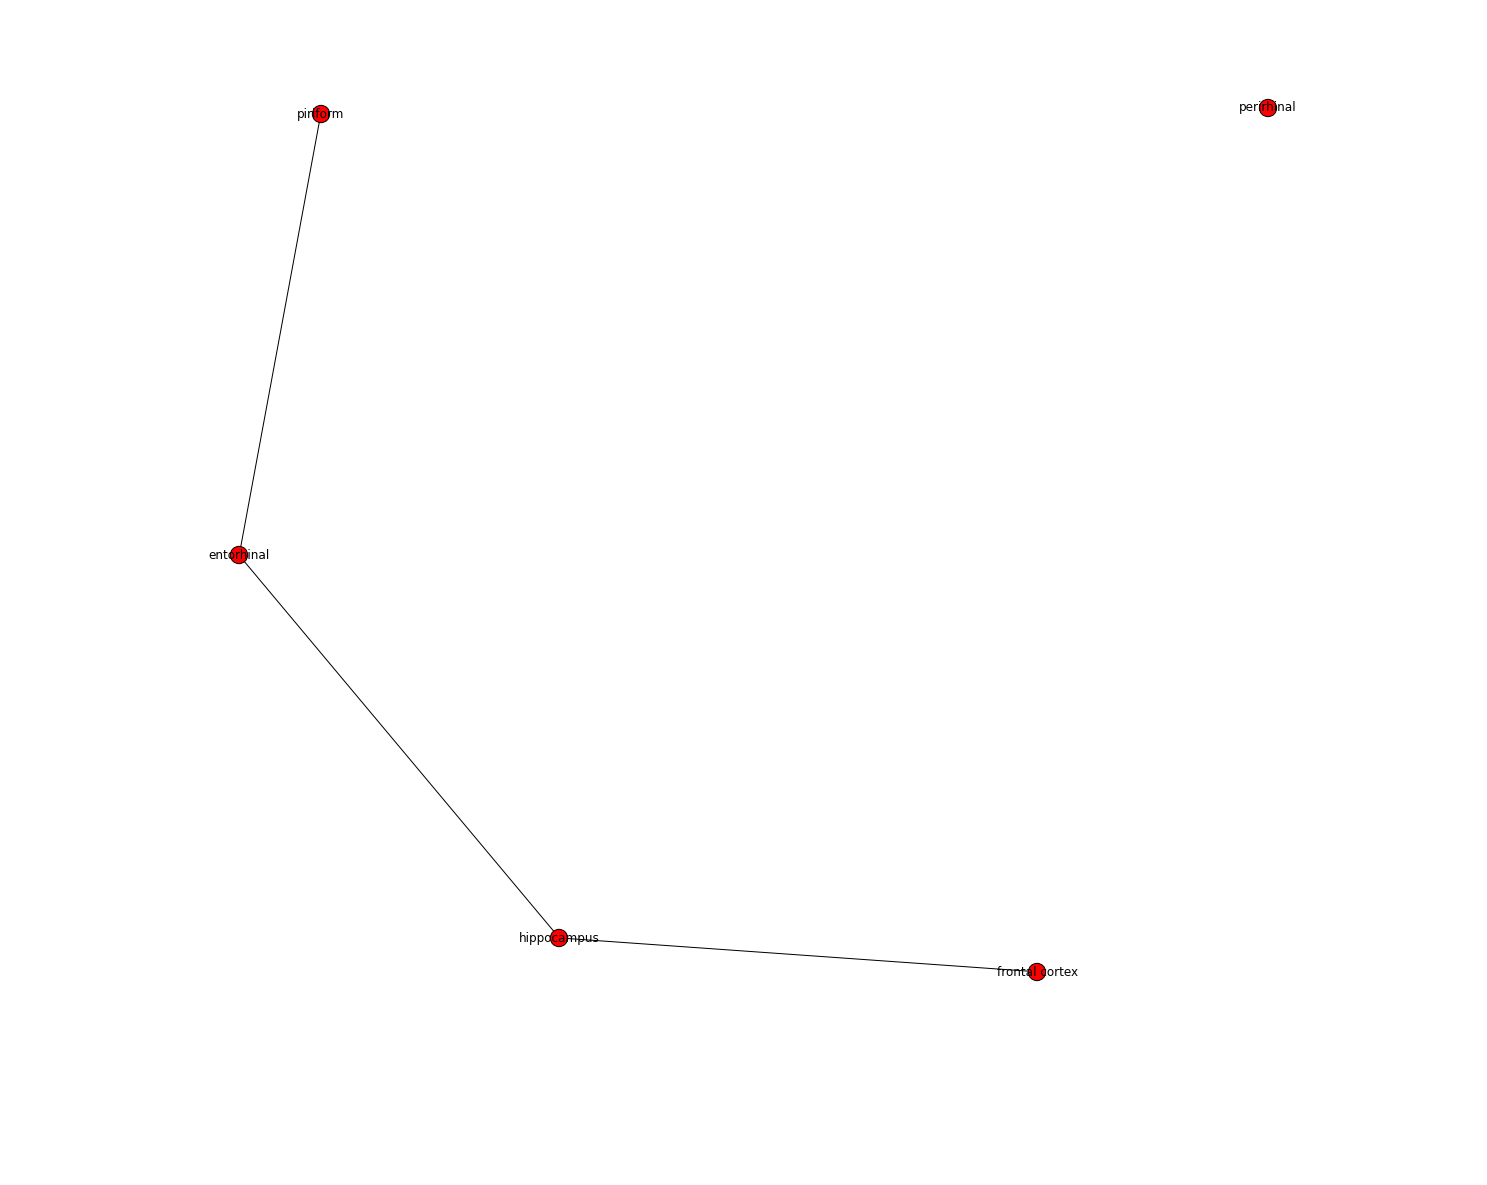

In [6]:
nx.draw(g,with_labels=True)

There is A LOT you can do with networks, today we'll focus on some basic visualization and quantiifcation of traits. In ther interest of space I'm going to grab one of the prebuilt graphs they have in NetworkX. In this case we'll be using the 'davis southern woman' network.  They represent observed attendance at 14 social events by 18 Southern women. I'll declare this graph as G

In [7]:
G=nx.davis_southern_women_graph()

Let's draw it!

basic


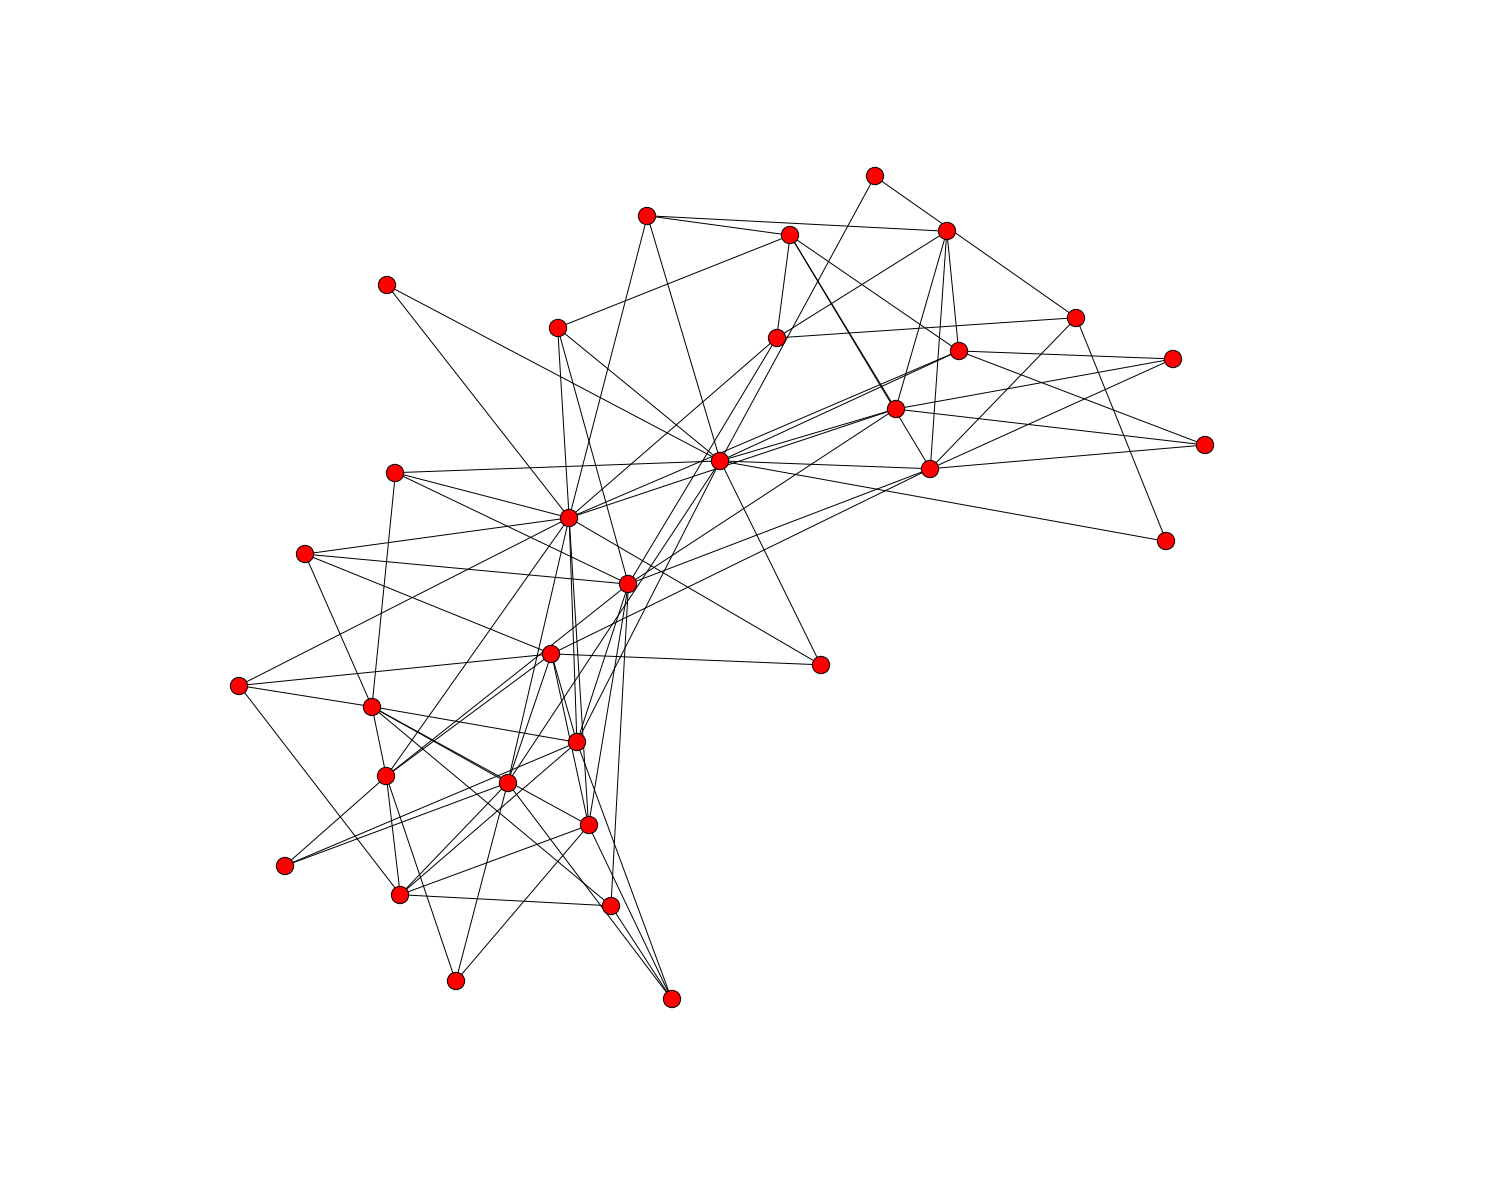

In [8]:
nx.draw(G)
print'basic'

There are lots of ways to plot this data, the default is called a spring network, imagine the nodes are springs, lots of nodes with other nodes in their neighborhood are more closely pulled together, nodes with few connections dangle far away. Next we'll draw nodes with random positions.

random positions


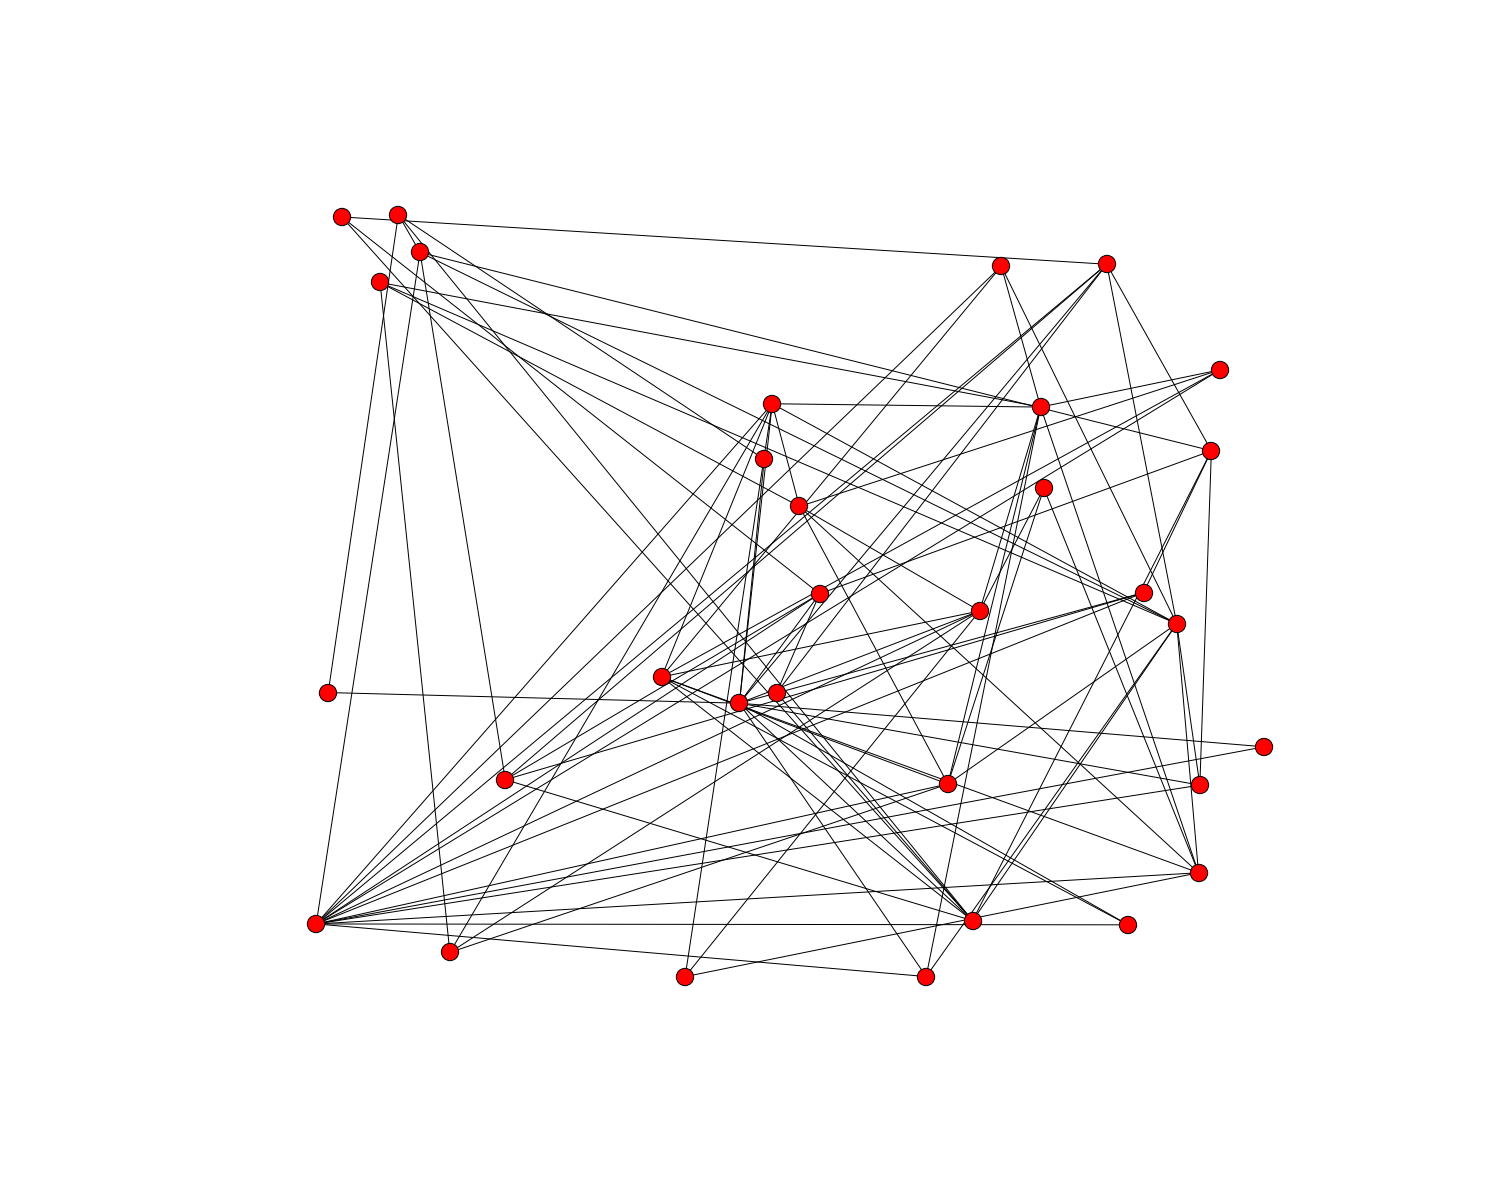

In [9]:
nx.draw_random(G)
print 'random positions'

We can also place all the nodes on the outside and see their connections, this is called a circular graph.

circular graph


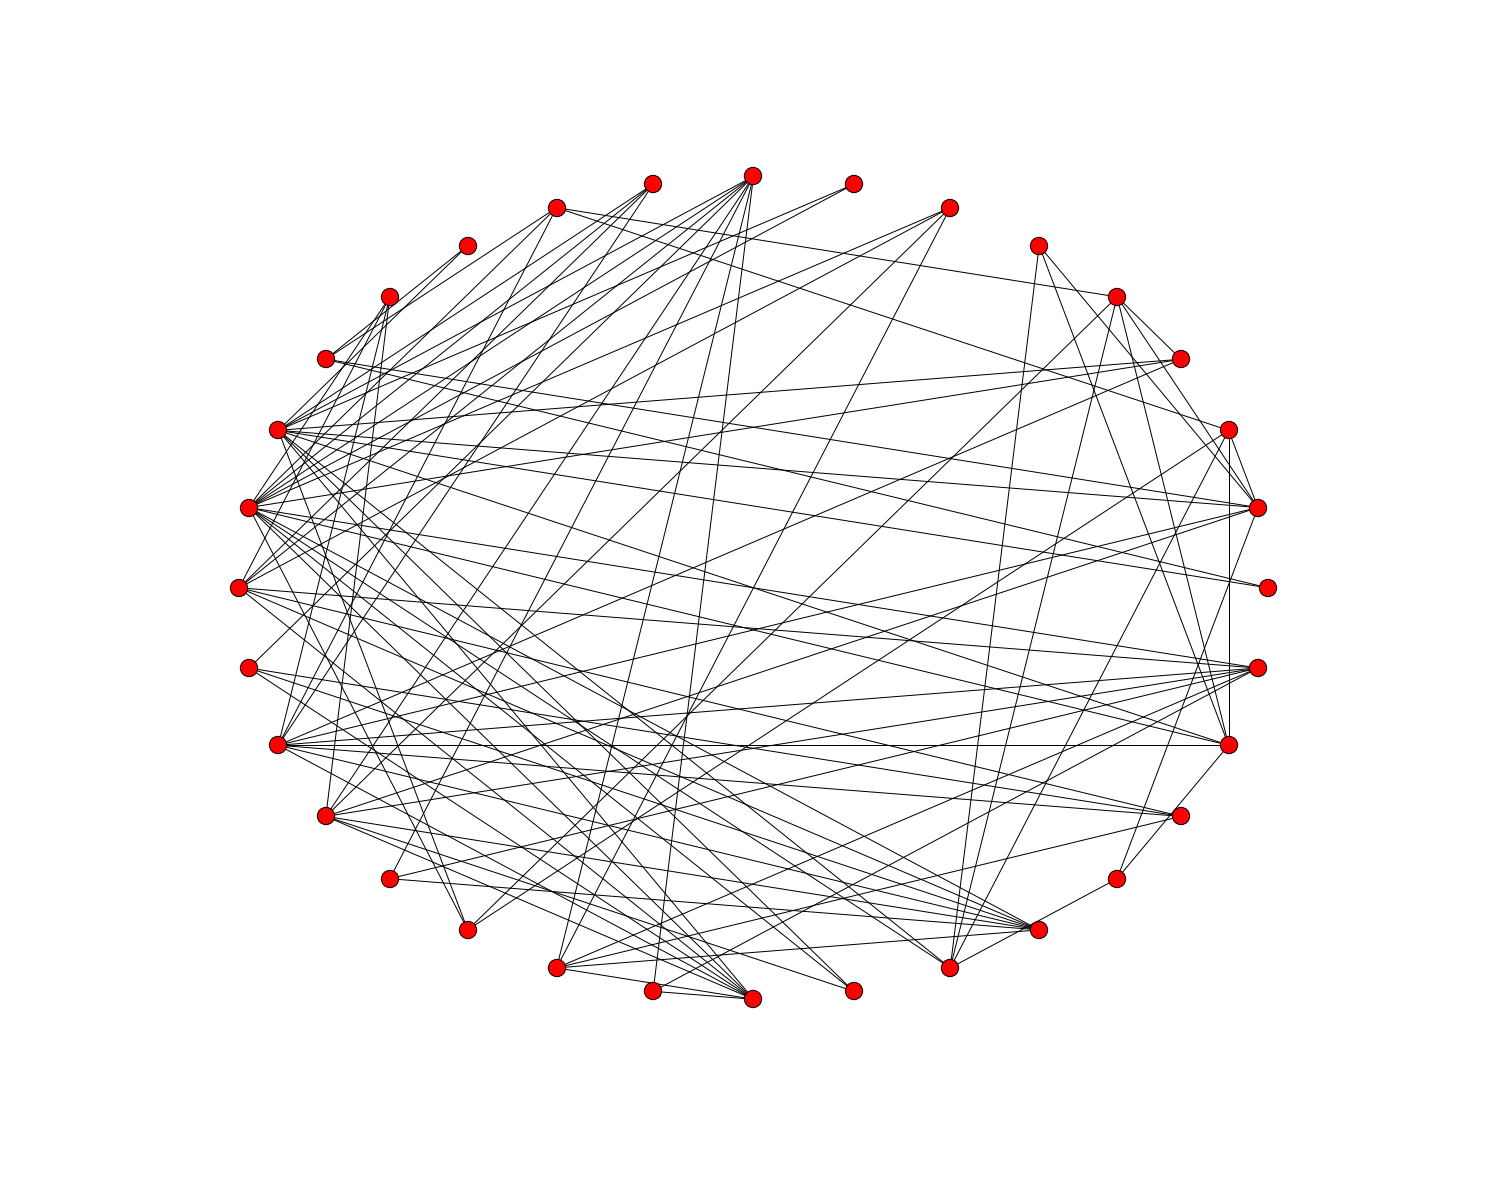

In [10]:
nx.draw_circular(G)
print 'circular graph'

The next class is called spectral format, it's complicated what it means 

spectral graph


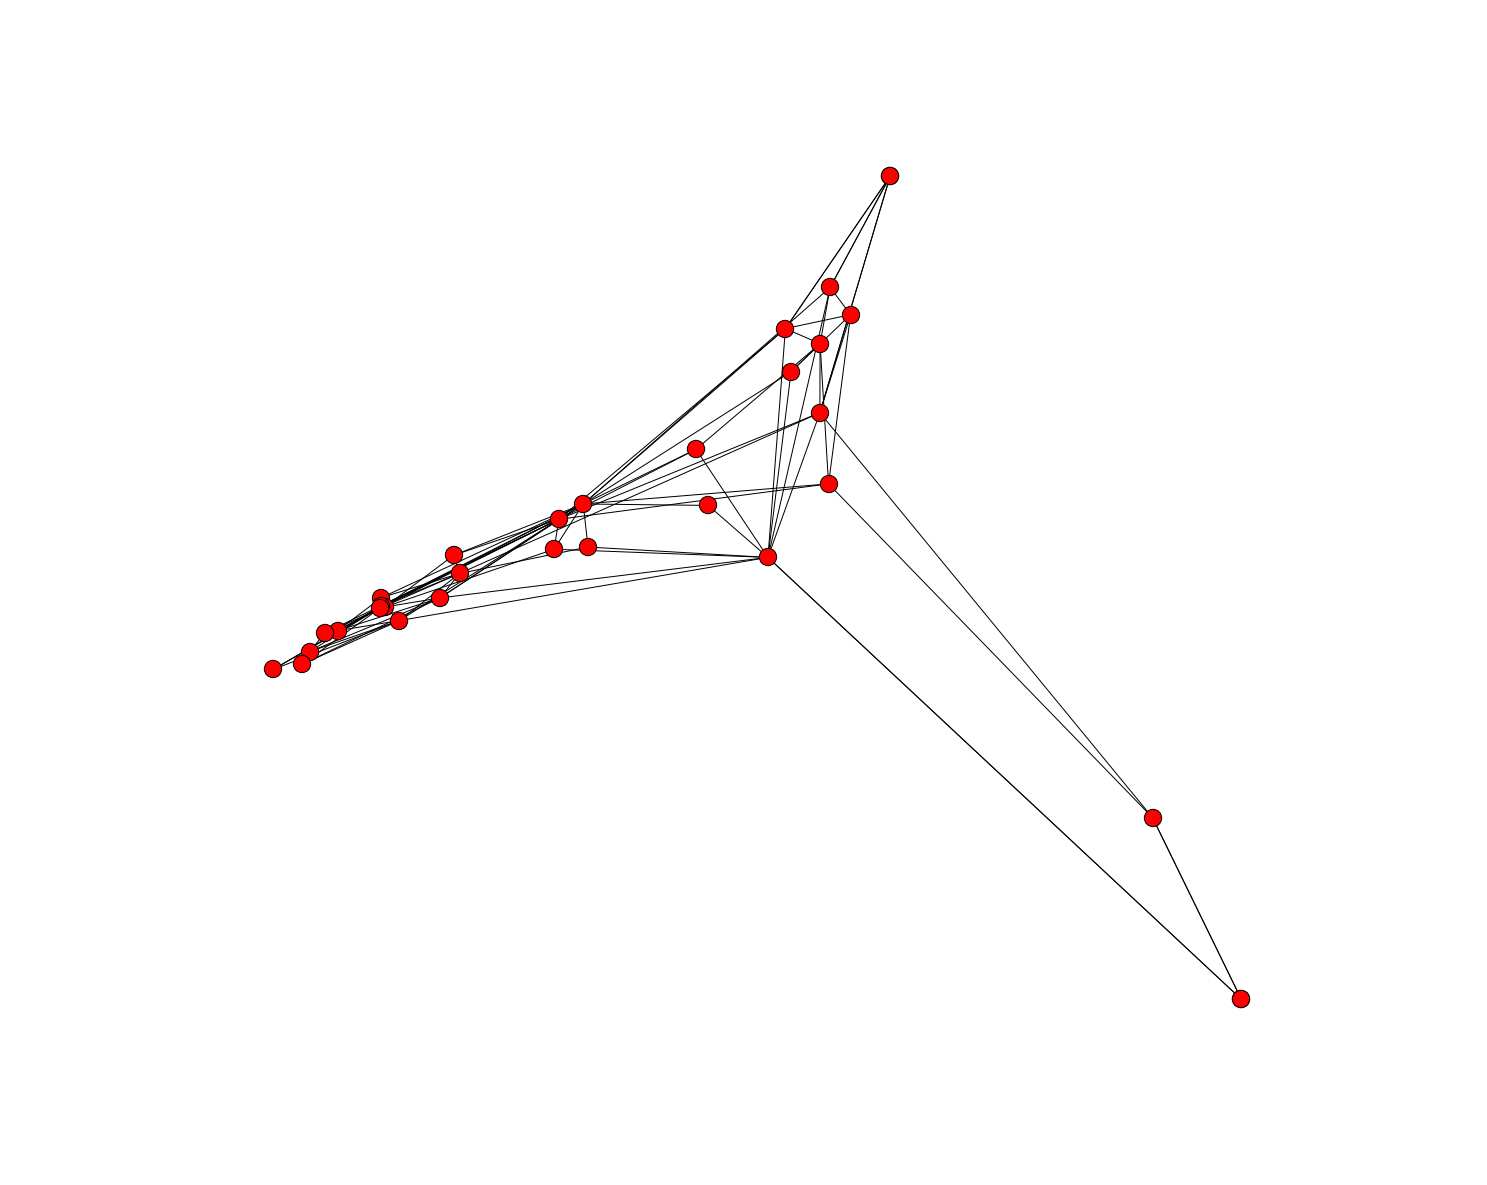

In [11]:
nx.draw_spectral(G)
print 'spectral graph'

net we are going to add the name of the nodes to the nodes, we do this with the tag with_labels=True, we are also defining the positions explicitly with the spring_layout command.

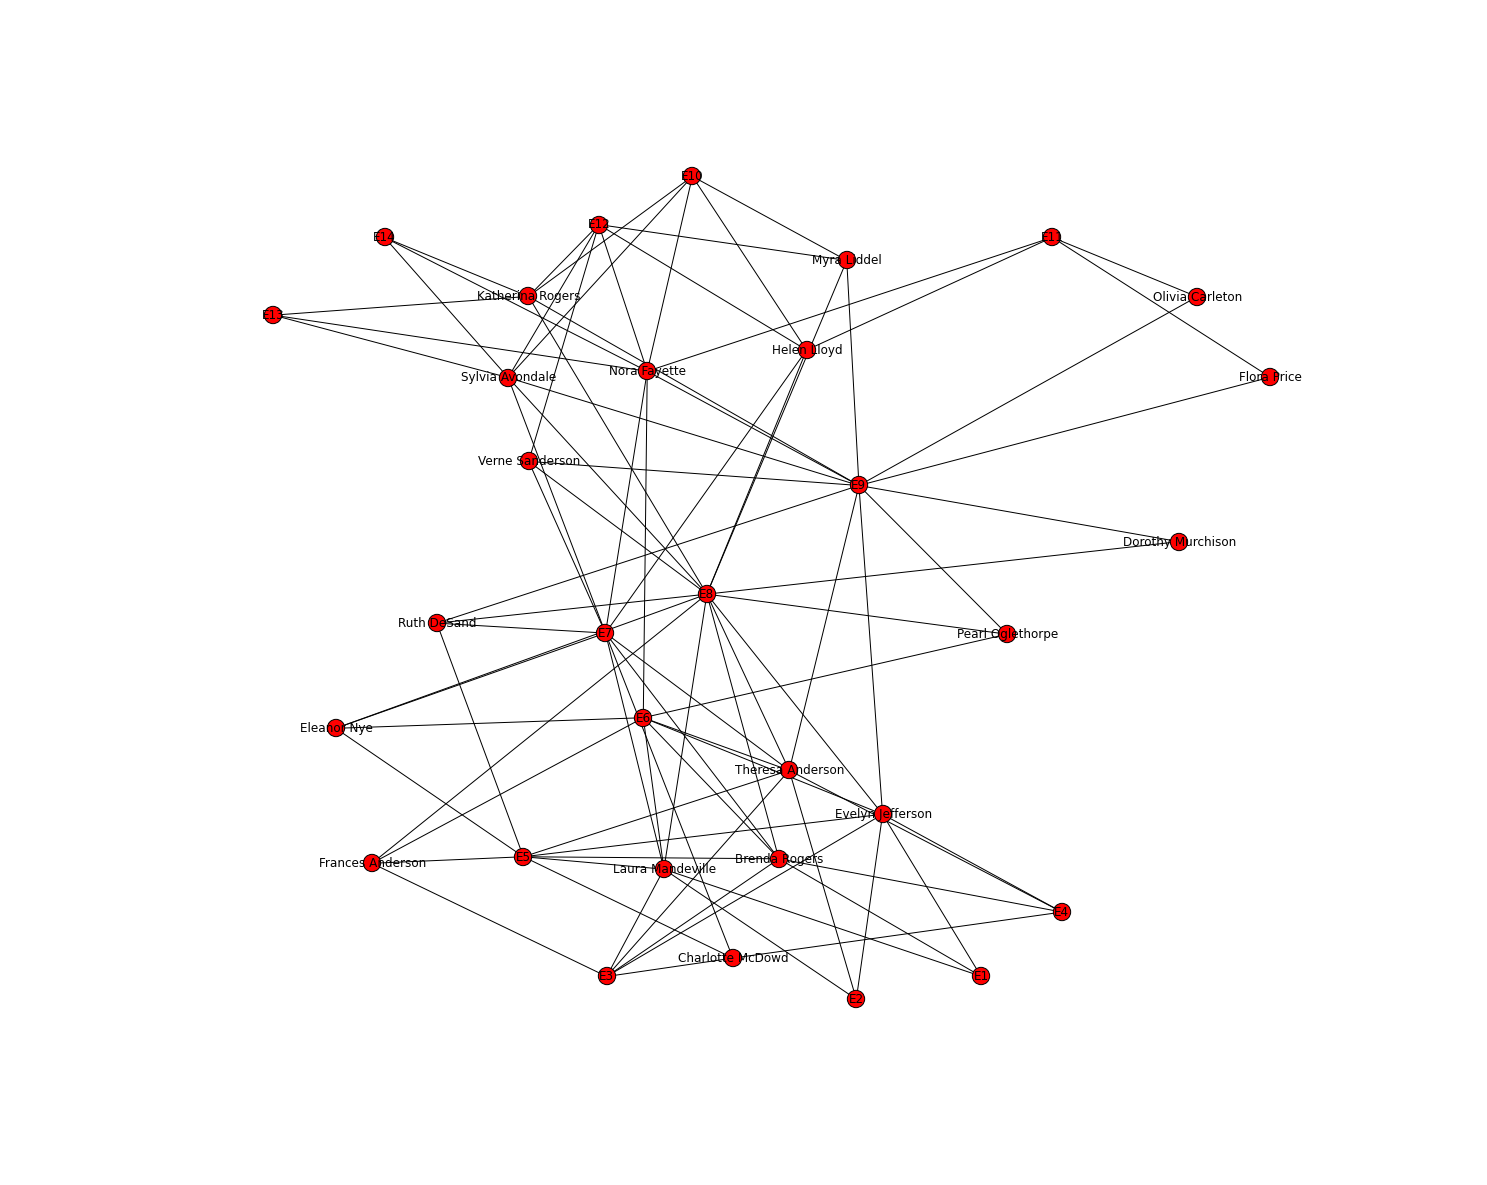

In [12]:
positions = nx.spring_layout(G)
nx.draw(G,positions, with_labels=True)


Next we will have each node be equivelent in size to the number connections it has, we'll discuss the degree command i ndepth soon, but for now, know that it means 'number of nodes that connect with this one'

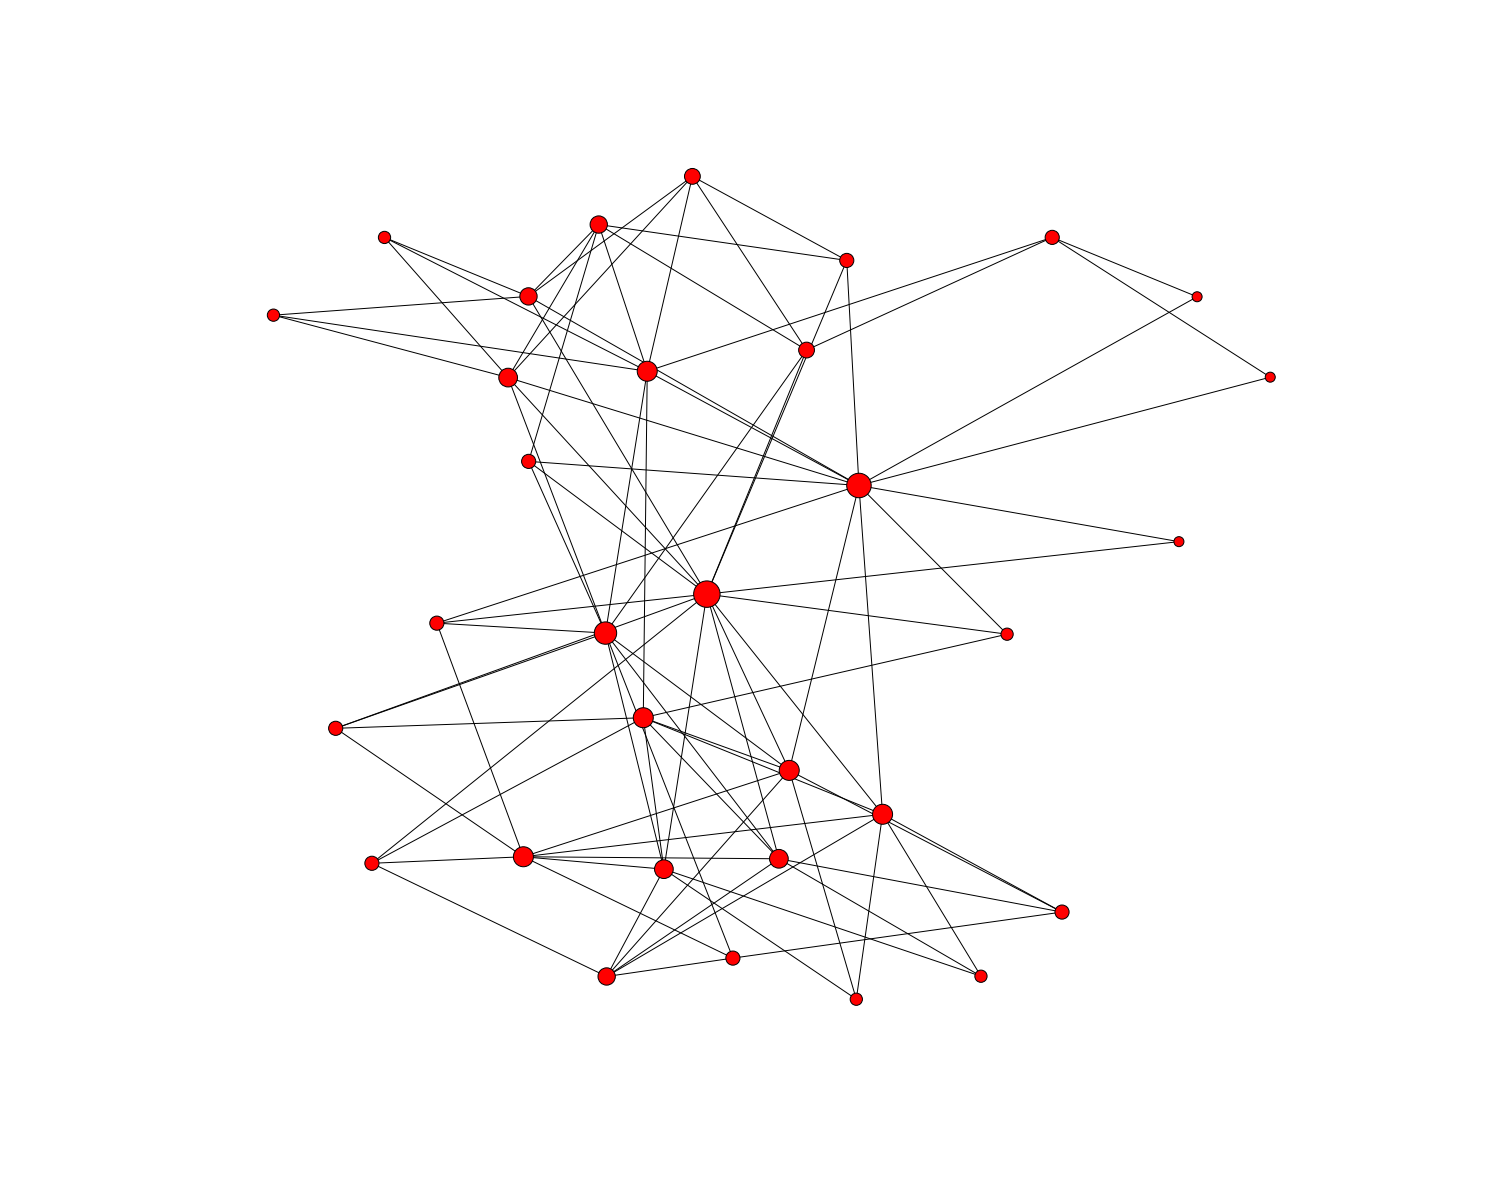

In [13]:
node_sizes=[G.degree(i)*50 for i in G.nodes()]
nx.draw(G,positions,node_size=node_sizes)

That's a fun toy network but let's play with a REAL network, I've given you the allen brain atlas matrix, it's a list of all regions and their connective strengths in a mouse brain let's import it and get it plotted. We are going to import it with np.genfromtext, and we'll import it as a string so we can get the names associated with each row.

In [15]:
x = np.genfromtxt('ad_matrix.csv', delimiter=',', dtype='string'
              )

Now let's grab the bit with numbers and convert it to a matrix! it's just that easy, this is called an 'adjacency matrix' where columns and rows meet at connection points. We'll also grab a variable called names for later

In [39]:
values=x[1:,1:].astype('float')
new_g=nx.from_numpy_matrix(values)
names=x[0][1:]
idx_name_dict=dict(zip(new_g.nodes(),names))

let's plot it! with the same size trick as before

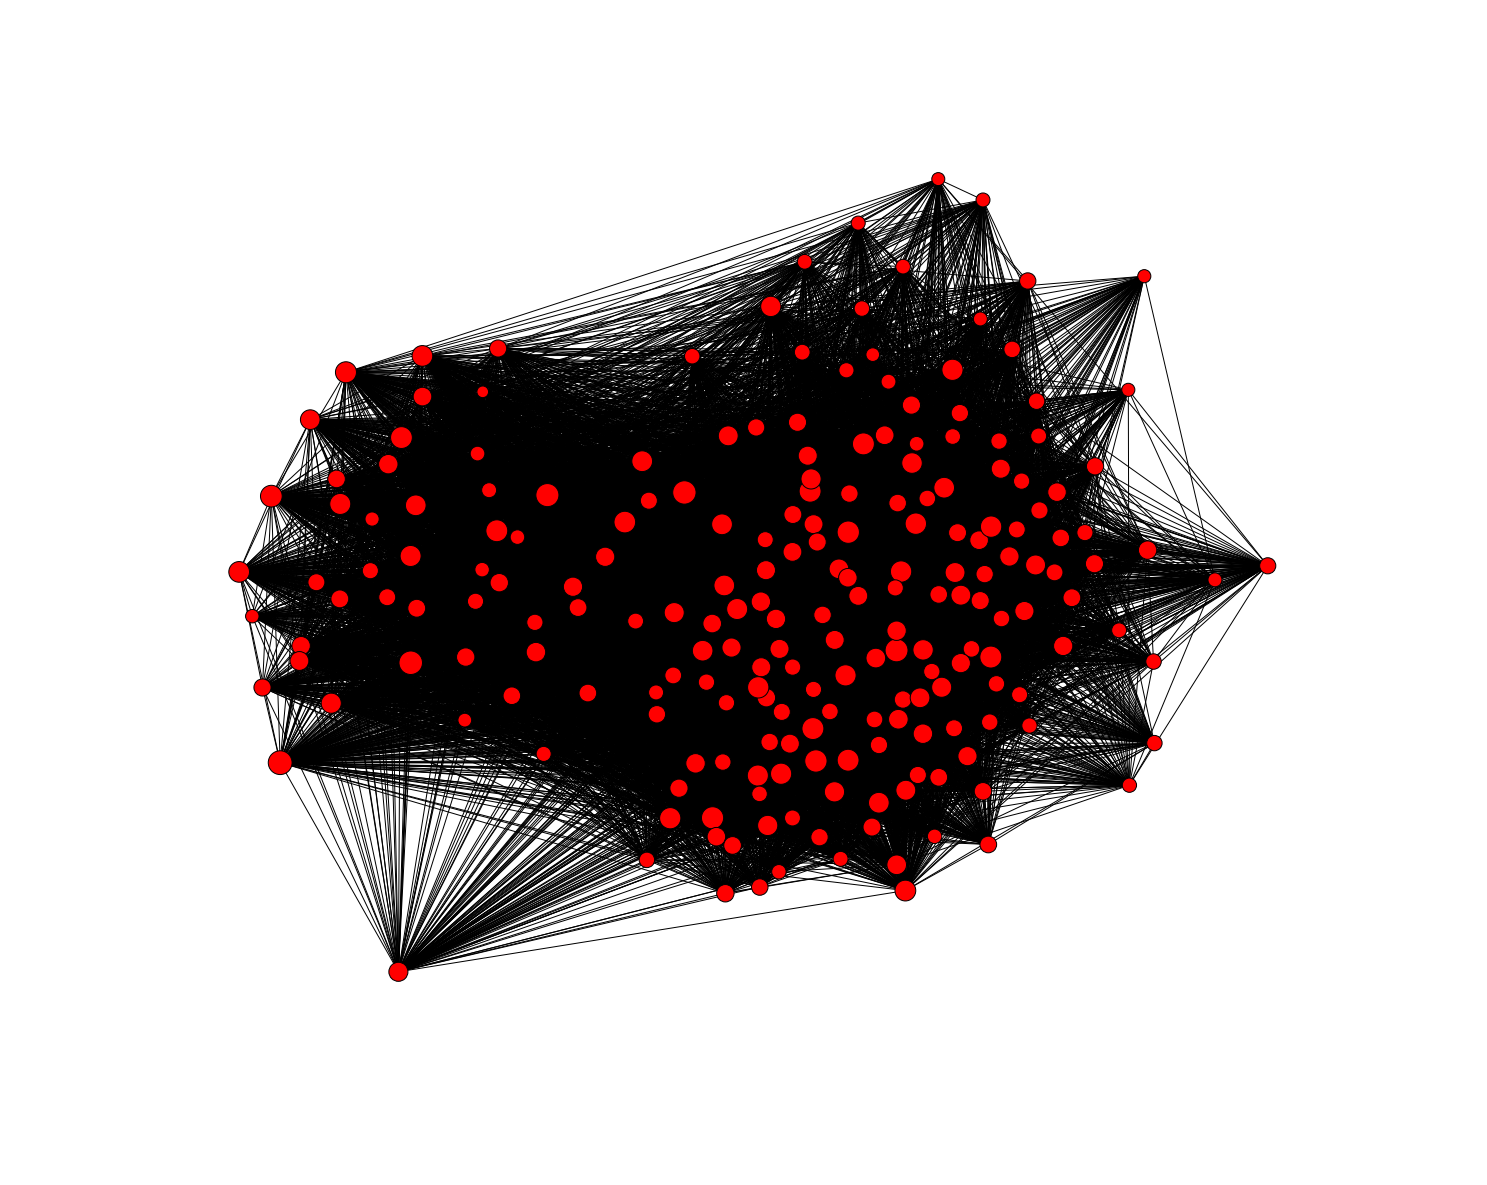

In [17]:
node_sizes=[new_g.degree(i)**1.2 for i in new_g.nodes()]
positions = nx.spring_layout(new_g)
nx.draw(new_g,positions,node_size=node_sizes)

Well that's a bit of a mess, in reality, netowrkx is actually not very good for this kind of plotting, gephi is better. though networkx can help us clean the graph up for gephi. for the moment we won't worry about that, we'll work here. Lets add names to our nodes, to do this we make a paired list: with a range the length of our nodes and the names file, we'll then make this a dictionary, don't get too bogged down with the specifics of this, jsut know that it works for this conversion. We'll then use relabel and make a new matrix cleanedup

In [18]:
renamer=dict(zip(range(len(new_g.node)),names))
cleanedup=nx.relabel_nodes(new_g,renamer)

Run .node to confirm it worked.

In [19]:
cleanedup.node

{'AAA': {},
 'ACAd': {},
 'ACAv': {},
 'ACB': {},
 'AD': {},
 'AHN': {},
 'AId': {},
 'AIp': {},
 'AIv': {},
 'AMB': {},
 'AMd': {},
 'AMv': {},
 'AN': {},
 'AOB': {},
 'AON': {},
 'APN': {},
 'ARH': {},
 'AUDd': {},
 'AUDp': {},
 'AUDv': {},
 'AV': {},
 'BLA': {},
 'BMA': {},
 'BST': {},
 'CA1': {},
 'CA2': {},
 'CA3': {},
 'CEA': {},
 'CENT': {},
 'CL': {},
 'CLA': {},
 'CLI': {},
 'CM': {},
 'COAa': {},
 'COAp': {},
 'CP': {},
 'CS': {},
 'CUL': {},
 'CUN': {},
 'DCO': {},
 'DG': {},
 'DMH': {},
 'DN': {},
 'DP': {},
 'DR': {},
 'ECT': {},
 'ENTl': {},
 'ENTm': {},
 'EPd': {},
 'EPv': {},
 'FL': {},
 'FN': {},
 'FRP': {},
 'FS': {},
 'GPe': {},
 'GPi': {},
 'GRN': {},
 'GU': {},
 'IA': {},
 'ICc': {},
 'ICd': {},
 'ICe': {},
 'ILA': {},
 'IMD': {},
 'IO': {},
 'IP': {},
 'IPN': {},
 'IRN': {},
 'LA': {},
 'LAV': {},
 'LD': {},
 'LGd': {},
 'LGv': {},
 'LH': {},
 'LHA': {},
 'LP': {},
 'LPO': {},
 'LRN': {},
 'LSc': {},
 'LSr': {},
 'LSv': {},
 'MA': {},
 'MARN': {},
 'MD': {},
 'MDR

and replot it with names, let's try the shell layout this time!

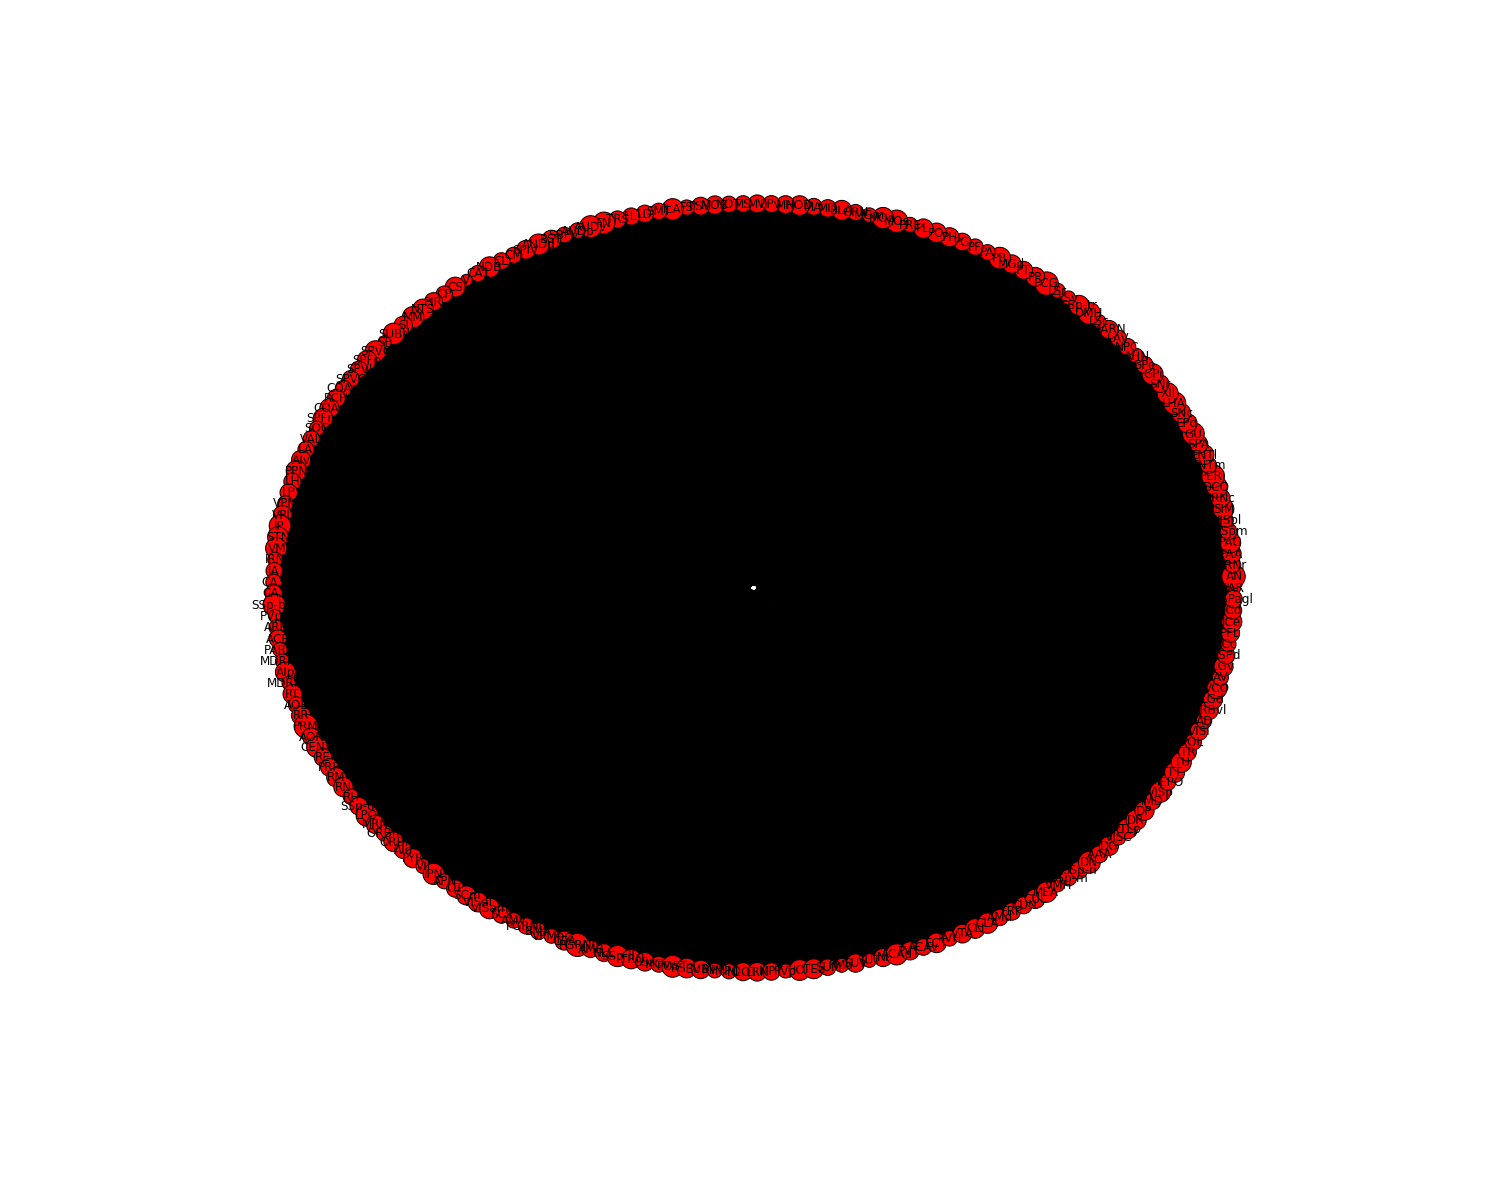

In [20]:
node_sizes=[cleanedup.degree(i)**1.2 for i in cleanedup.nodes()]
positions = nx.shell_layout(cleanedup)
nx.draw(cleanedup,positions,node_size=node_sizes,with_labels=True)

Still a total mess, let's see why by checking number of nodes, number of edges, and density (% of total connections)

In [21]:
cleanedup.number_of_edges()
cleanedup.number_of_nodes()
nx.density(cleanedup)

0.5928337319514572

And we find 60% of the possible connections occur, let's shave this down! Luckily this network is quantitative, so let's say we only care about the top 5% most powerful connections. First go back to our original numpy graph. find the 5% cut off value and replot! numpy has a nice command percentile. Then we'll filter by only connections stronger than that and redo all the stuff to make a new grarph: powerful connections. Then we'll plot it

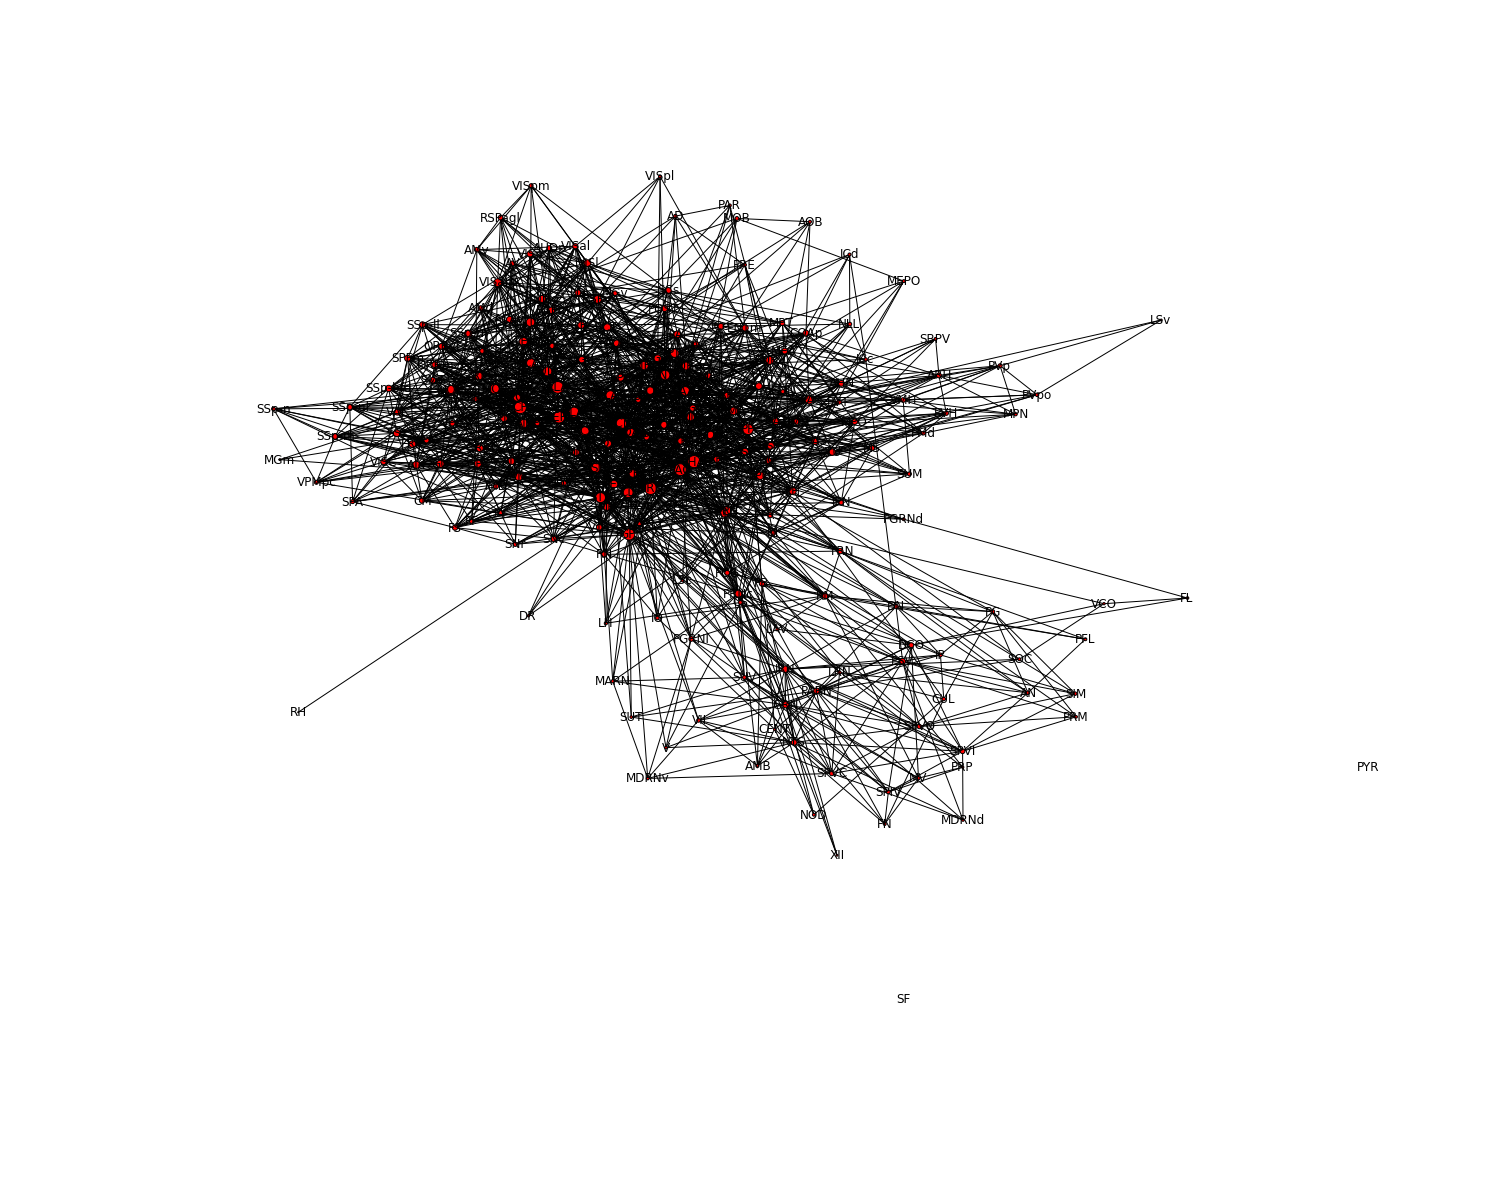

In [22]:
values=x[1:,1:].astype('float')
p=np.percentile(values,95)
top_5_percent=(values>p)*1
top_5_g=nx.from_numpy_matrix(top_5_percent)
top_5_g_with_proper_names=nx.relabel_nodes(top_5_g,renamer)

#now plot

node_sizes=[top_5_g_with_proper_names.degree(i)**1.2 for i in top_5_g_with_proper_names.nodes()]
positions = nx.spring_layout(top_5_g_with_proper_names)
nx.draw(top_5_g_with_proper_names,positions,node_size=node_sizes,with_labels=True)

This is way more usable, for fun try other percentile values, here we'll try 1

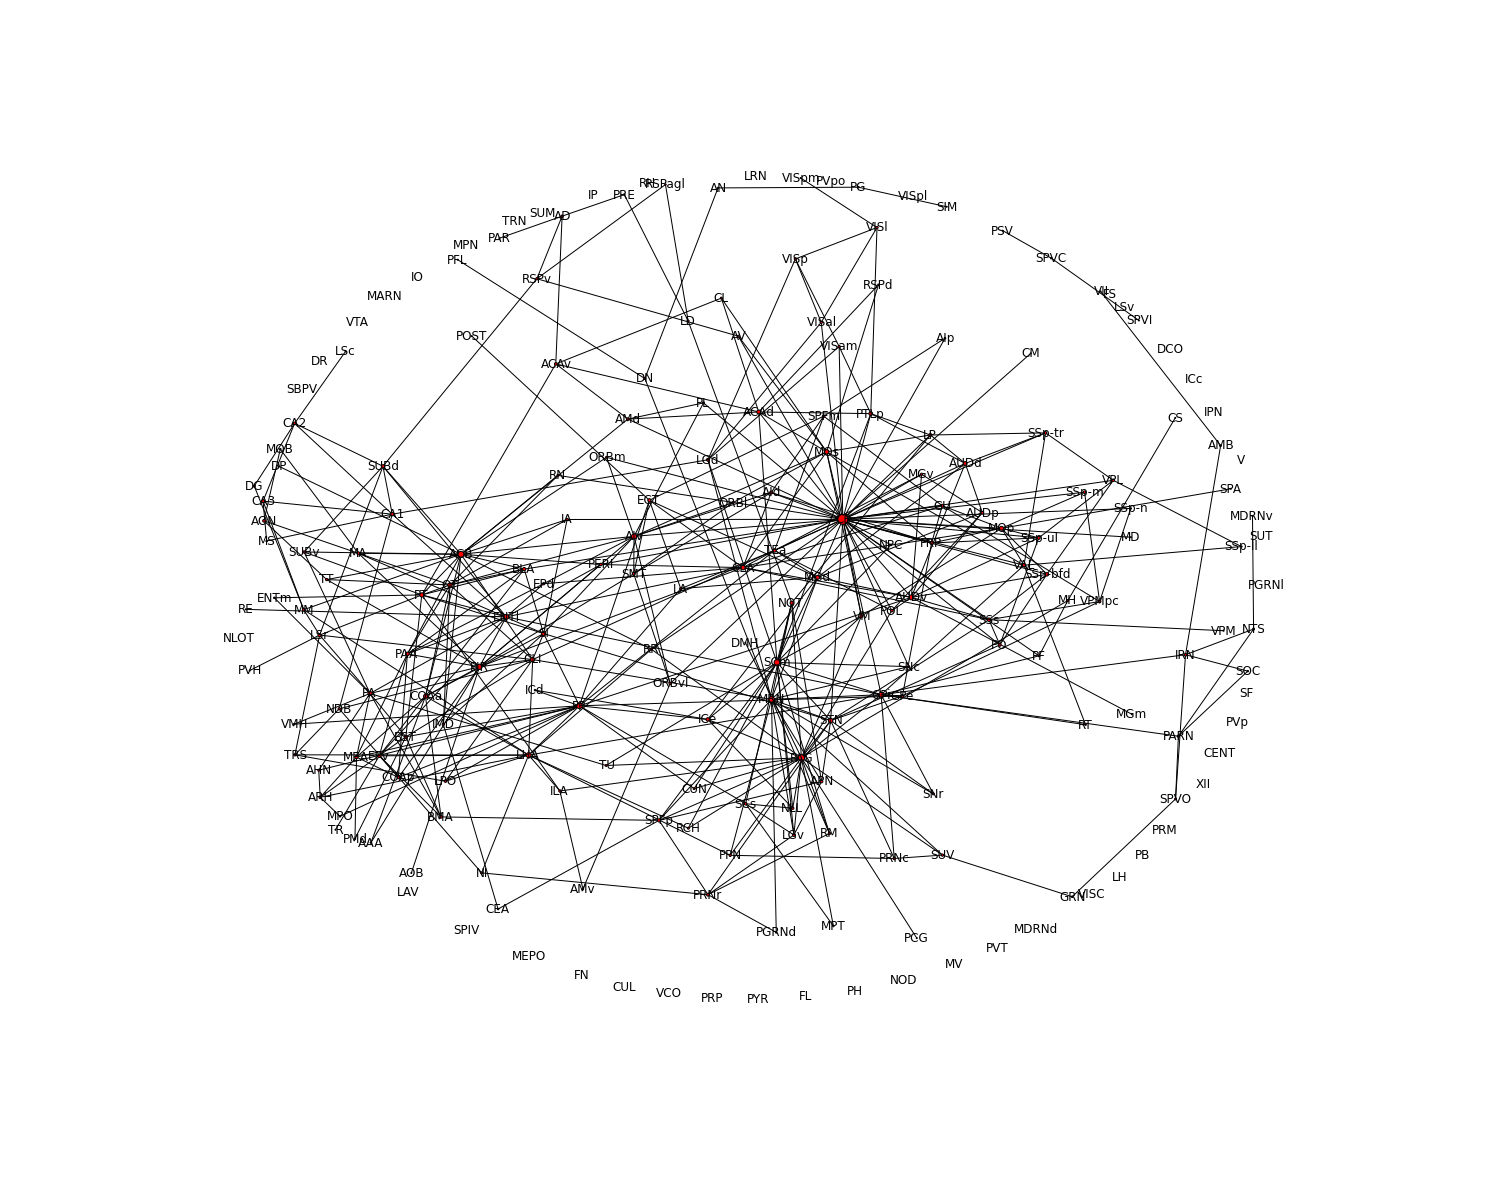

In [23]:
values=x[1:,1:].astype('float')
p=np.percentile(values,99)
top_1_percent=(values>p)*1
top_1_g=nx.from_numpy_matrix(top_1_percent)
top_1_g_with_proper_names=nx.relabel_nodes(top_1_g,renamer)

#now plot

node_sizes=[top_1_g_with_proper_names.degree(i)**1.2 for i in top_1_g_with_proper_names.nodes()]
positions = nx.spring_layout(top_1_g_with_proper_names)
nx.draw(top_1_g_with_proper_names,positions,node_size=node_sizes,with_labels=True)


Now we are getting cool. Of course I'm cheating here and using this as an undirected graph, for the moment I'm going to cheat and keep using that. For further analysis I'm going to use the 5% graph it's nicely connected without being painfully over connected. Depenging on your personal mathematical sophistication, most of the commands I'm going to use next can be adpated to both quantitative and directed graphs. Next we are going to evaluate network 'topology'/

In [24]:
print('density')
print(nx.density(top_5_g_with_proper_names))

density
0.0927008592435


next we'll look at connected components, this is a realatively meaningless analysis in the brain as all regions should be connected, but lets see what is stongly connected

In [25]:
ccs=nx.connected_components(top_5_g_with_proper_names)
ccsl=[i for i in ccs]
print ccsl

[['PAR', 'AMB', 'PVp', 'PARN', 'PRNr', 'PPN', 'PAA', 'PFL', 'PAG', 'VISpm', 'VISpl', 'MDRNd', 'SIM', 'PRNc', 'PRE', 'DCO', 'RN', 'AOB', 'RR', 'EPv', 'AON', 'PERI', 'ENTm', 'ENTl', 'CENT', 'RE', 'SPVC', 'PRP', 'RM', 'EPd', 'RH', 'PG', 'GU', 'SNc', 'LHA', 'XII', 'SSp-ul', 'LPO', 'MRN', 'ORBm', 'ORBl', 'VPL', 'GPi', 'VCO', 'GPe', 'VII', 'AHN', 'NPC', 'NLL', 'APN', 'LAV', 'OT', 'NTS', 'SCm', 'SOC', 'LSc', 'DMH', 'IPN', 'SSp-tr', 'VISal', 'VISam', 'LSv', 'LSr', 'MPT', 'PCG', 'SCs', 'AMv', 'PGRNd', 'PP', 'BMA', 'VPMpc', 'PT', 'PGRNl', 'TRN', 'PB', 'PA', 'PF', 'SPA', 'PH', 'PO', 'PL', 'SSp-ll', 'MGd', 'MOs', 'MOp', 'SSs', 'MGm', 'GRN', 'TRS', 'AN', 'BLA', 'SUBv', 'MD', 'MA', 'MM', 'MPO', 'CUL', 'NLOT', 'MH', 'LRN', 'PRM', 'SUBd', 'MV', 'MS', 'NOT', 'MOB', 'PSV', 'MGv', 'ACB', 'FS', 'IO', 'ILA', 'TEa', 'SUM', 'SMT', 'LD', 'PMd', 'SUV', 'SUT', 'RT', 'FL', 'POST', 'FN', 'AUDv', 'NI', 'ACAd', 'PVT', 'AUDp', 'SBPV', 'BST', 'ACAv', 'AUDd', 'ECT', 'PVH', 'NOD', 'VTA', 'SPIV', 'IMD', 'CM', 'CL', 'NDB

The two regions disconnected are subzones of the striatum (for the SF) and a subzone of the cerebellum. It's not surprising. Let's run an iterative shaving analysis:

In [26]:
for perc in range(95,100):
    values=x[1:,1:].astype('float')
    p=np.percentile(values,perc)
    shaved=(values>p)*1
    shaved=nx.from_numpy_matrix(shaved)
    shaved=nx.relabel_nodes(shaved,renamer)
    ccs=nx.connected_components(shaved)
    ccsl=[i for i in ccs]
    print(np.float(nx.density(shaved)))
    print(ccsl)


0.0927008592435
[['PAR', 'AMB', 'PVp', 'PARN', 'PRNr', 'PPN', 'PAA', 'PFL', 'PAG', 'VISpm', 'VISpl', 'MDRNd', 'SIM', 'PRNc', 'PRE', 'DCO', 'RN', 'AOB', 'RR', 'EPv', 'AON', 'PERI', 'ENTm', 'ENTl', 'CENT', 'RE', 'SPVC', 'PRP', 'RM', 'EPd', 'RH', 'PG', 'GU', 'SNc', 'LHA', 'XII', 'SSp-ul', 'LPO', 'MRN', 'ORBm', 'ORBl', 'VPL', 'GPi', 'VCO', 'GPe', 'VII', 'AHN', 'NPC', 'NLL', 'APN', 'LAV', 'OT', 'NTS', 'SCm', 'SOC', 'LSc', 'DMH', 'IPN', 'SSp-tr', 'VISal', 'VISam', 'LSv', 'LSr', 'MPT', 'PCG', 'SCs', 'AMv', 'PGRNd', 'PP', 'BMA', 'VPMpc', 'PT', 'PGRNl', 'TRN', 'PB', 'PA', 'PF', 'SPA', 'PH', 'PO', 'PL', 'SSp-ll', 'MGd', 'MOs', 'MOp', 'SSs', 'MGm', 'GRN', 'TRS', 'AN', 'BLA', 'SUBv', 'MD', 'MA', 'MM', 'MPO', 'CUL', 'NLOT', 'MH', 'LRN', 'PRM', 'SUBd', 'MV', 'MS', 'NOT', 'MOB', 'PSV', 'MGv', 'ACB', 'FS', 'IO', 'ILA', 'TEa', 'SUM', 'SMT', 'LD', 'PMd', 'SUV', 'SUT', 'RT', 'FL', 'POST', 'FN', 'AUDv', 'NI', 'ACAd', 'PVT', 'AUDp', 'SBPV', 'BST', 'ACAv', 'AUDd', 'ECT', 'PVH', 'NOD', 'VTA', 'SPIV', 'IMD', 

Now this is a crazy feature of the brain, we can cut 99% of the connections and get down to 2% connection density and still have  only a few regions knocked off. This is a common feature of preferentially attached networks, these are networks where very few nodes draw in a lot of the connections. Next lets see the average length between any two paths, this shoudl be farmiliar to you if you've ever played 6 degrees of Kevin bacon, in essence it's the average 'bacon number' of any two nodes in our network. First I have to remove the disconnected nodes! 

In [27]:
top_5_g_with_proper_names.remove_node('SF')
top_5_g_with_proper_names.remove_node('PYR')
nx.average_shortest_path_length(top_5_g_with_proper_names)


2.3440306928458585

There are lots of other metrics covered in Sayama including eccentricity, diameter and radius, rather than reproducing them here, I'll just reccomend you check out page 379.

Two cool metrics are 'perphiery' which is points that are furthest from all others, and 'center' whcih are points closest to all others.

In [28]:
print(nx.periphery(top_5_g_with_proper_names))
print(nx.center(top_5_g_with_proper_names))



['MDRNd', 'AOB', 'XII', 'LSv', 'FL', 'FN', 'SPIV', 'NOD', 'SPVC', 'SPVI', 'VCO', 'MEPO']
['PPN', 'RR', 'PERI', 'RM', 'RN', 'GU', 'SNc', 'MRN', 'GPi', 'NPC', 'APN', 'SCm', 'DMH', 'PAG', 'PCG', 'PP', 'PB', 'PH', 'TRN', 'MOs', 'MOp', 'MM', 'MH', 'ILA', 'AUDv', 'NI', 'ACAd', 'BST', 'CLI', 'CL', 'CLA', 'SPFp', 'AAA', 'RCH', 'LHA', 'TU', 'AIp', 'LP', 'STN', 'LGd', 'LGv', 'CEA', 'ICe']


The peripheral structures are a bunch of striatal, cerebellar, and spinal nuclei (shocker) and the central is msotly thalamic, midbrain, and isocortex.

There are lots of measures you can use to capture this more purely, by looking at neighbors and neighbors of neighbors. This is all pretty subtle and complicated check out sayama and other referencs for more explanation, so I'm only gonna look at one here: pagerank. Pagerank is basically, how many of your neighbros are well connected (ie who is popular amongst the popular kids)

In [29]:
page_ranks=nx.pagerank(top_5_g_with_proper_names)
pr_values=[page_ranks[i] for i in page_ranks]
#the next two lines are super dirty, I don't fully understand them and you don't ahve to either,I just looked up 'sort dictionary
#by values in python and using what showed up in stack exchange, sometimes you gotta do that
import operator
sorted_x = sorted(page_ranks.items(), key=operator.itemgetter(1))

In [30]:
sorted_x


[('RH', 0.0009258801661089493),
 ('MGm', 0.001263413740709441),
 ('LSv', 0.0014641728385281479),
 ('DR', 0.001474761696067397),
 ('XII', 0.001557011043038862),
 ('LSc', 0.0017450816243046053),
 ('VISpl', 0.0018580008447451593),
 ('PAR', 0.0018976293920119776),
 ('PRP', 0.0019055865266064),
 ('SUT', 0.0019486194942322692),
 ('AOB', 0.0019578945801456333),
 ('SBPV', 0.0019721321249454356),
 ('MEPO', 0.0019743992401499936),
 ('V', 0.0020090977401047076),
 ('ICd', 0.0020859180687721928),
 ('VCO', 0.002108051318793291),
 ('LH', 0.002153405019355876),
 ('PGRNd', 0.002174113719649828),
 ('PRM', 0.0021859354547928483),
 ('MDRNd', 0.0022051821253917347),
 ('PFL', 0.0022162219684180714),
 ('MPN', 0.002236593366964545),
 ('FL', 0.0022571046376842663),
 ('SOC', 0.002308842203504311),
 ('CENT', 0.0023135323562128223),
 ('PRE', 0.002328205119740072),
 ('ICc', 0.0023298377939894883),
 ('MDRNv', 0.0023646050523229195),
 ('AD', 0.002369623949108165),
 ('NOD', 0.0024021473769587484),
 ('SSp-n', 0.002423

The answers are actually a bit surprising, networks are weird! reticular nucleus, caudate and periductal greay (probably an artifact, PERI is the first one I actually believe) remember these are thresholded and bicirectional, in a proper nonthresholded analysis this probably won't be true

Last metric for today, clustering: clustering is measuring neighborhoods, a high degree of clustering means a suepr connected neighborhood, low clustering means more spread out, basically it's measure of how connected your neighbors are to eachother.

In [31]:
print(nx.clustering(top_5_g_with_proper_names))
print(nx.average_clustering(top_5_g_with_proper_names))

{'PAR': 0.4, 'AIv': 0.4032258064516129, 'ACB': 0.26884779516358465, 'PARN': 0.29411764705882354, 'PRNr': 0.22379032258064516, 'PPN': 0.3032258064516129, 'PAA': 0.3697478991596639, 'SSp-tr': 0.4766666666666667, 'VISpm': 0.5714285714285714, 'VISpl': 0.5333333333333333, 'MDRNd': 1.0, 'SIM': 0.4, 'PRNc': 0.3046153846153846, 'PRE': 0.39285714285714285, 'DCO': 0.2878787878787879, 'CP': 0.1971153846153846, 'AOB': 0.5333333333333333, 'RR': 0.28421052631578947, 'EPv': 0.4, 'AON': 0.4155844155844156, 'PERI': 0.2902597402597403, 'ENTm': 0.34285714285714286, 'ENTl': 0.3146341463414634, 'CENT': 0.0, 'SBPV': 0.3333333333333333, 'PRP': 0.3333333333333333, 'RM': 0.3088235294117647, 'RN': 0.3904761904761905, 'RH': 0.0, 'GU': 0.41798941798941797, 'EPd': 0.4420289855072464, 'SNc': 0.5, 'VAL': 0.3742690058479532, 'XII': 0.6666666666666666, 'SSp-ul': 0.5916666666666667, 'LPO': 0.3275862068965517, 'MRN': 0.17509920634920634, 'ORBm': 0.5686274509803921, 'ORBl': 0.466403162055336, 'AId': 0.39, 'GPi': 0.196103

Plotting degree distribution

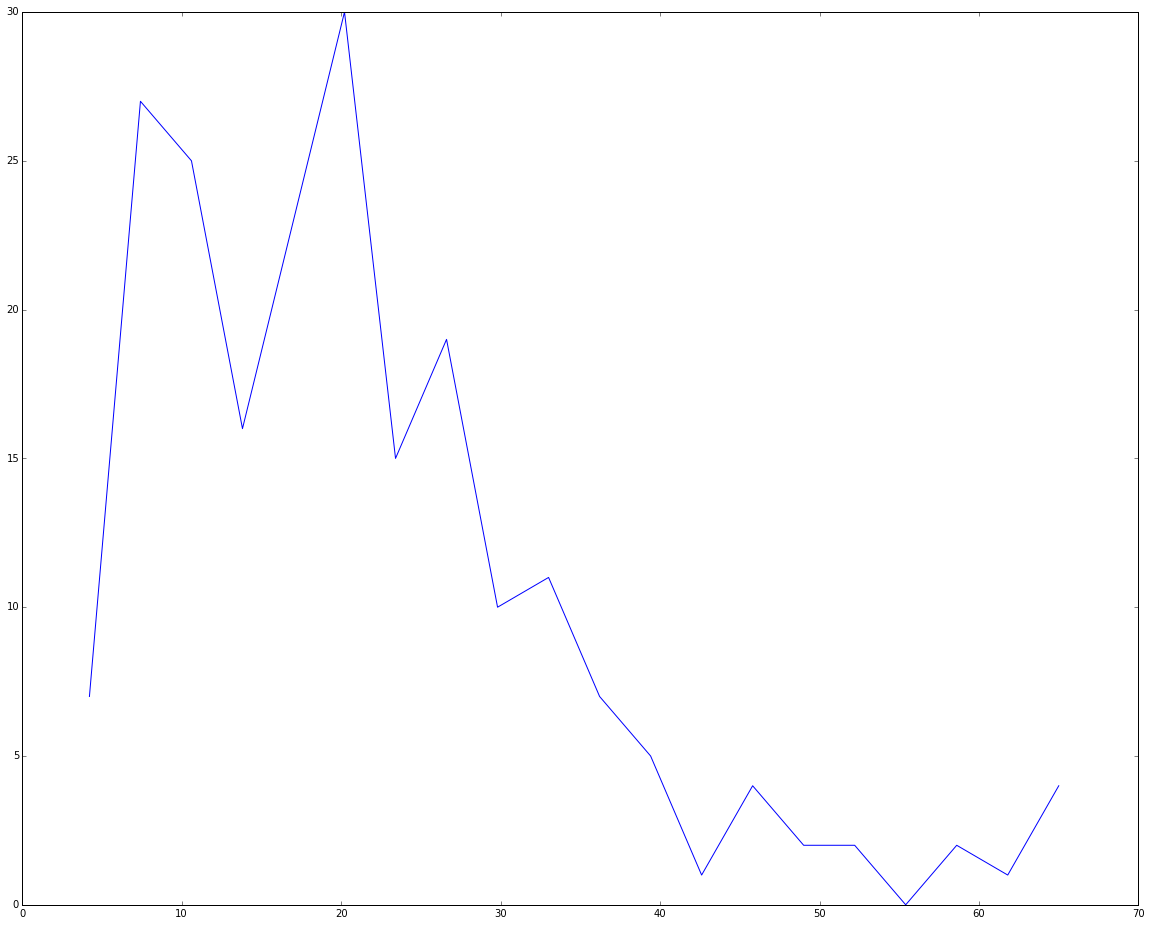

In [32]:
plt.plot(np.histogram(top_5_g_with_proper_names.degree().values(),bins=20)[1][1:]
         ,np.histogram(top_5_g_with_proper_names.degree().values(),bins=20)[0])


There is lots of other things and if you are going to write a real paper, I'd reccomend looking up assorativity and modularity cause it's cool, but we don't really have the time to discuss it here. Now go and do this with Swanson's network!

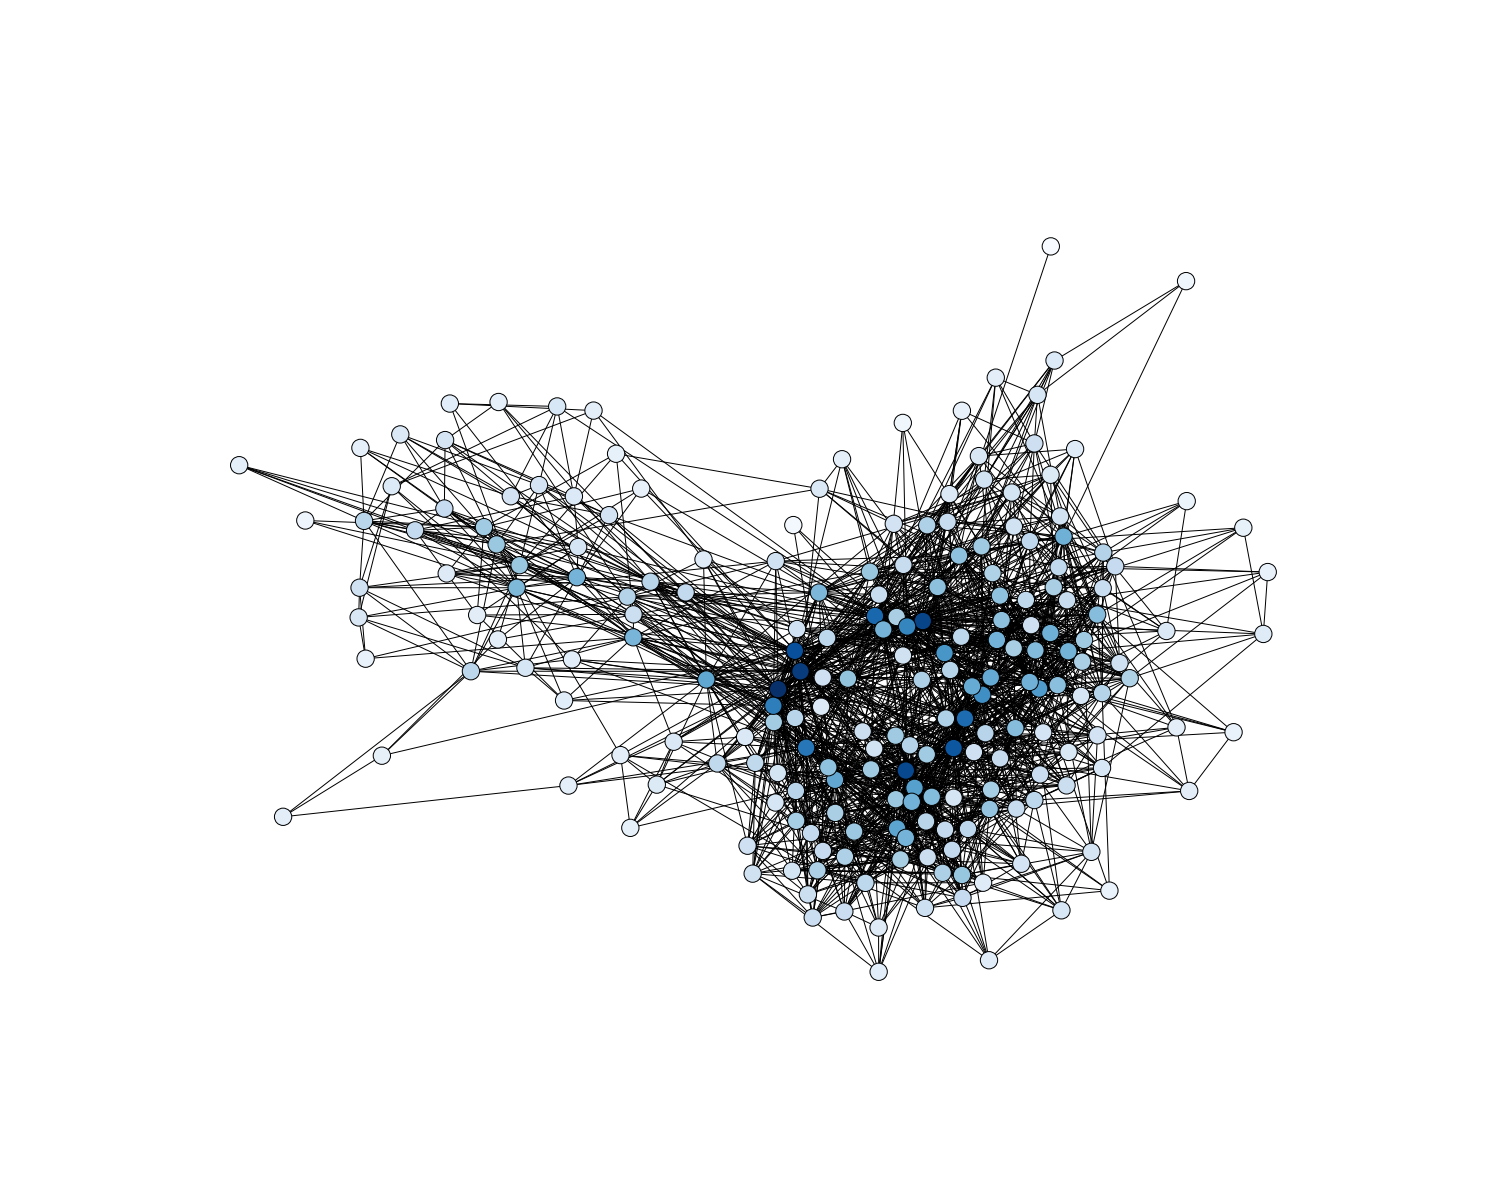

In [33]:
node_colors=[page_ranks[i] for i in top_5_g_with_proper_names.nodes()]
clust=nx.clustering(top_5_g_with_proper_names)
pos=nx.spring_layout(top_5_g_with_proper_names,iterations=500)
nx.draw(top_5_g_with_proper_names,pos,node_color=node_colors,cmap=plt.cm.Blues)